## Import Statements

In [1]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Setup Global Parameters

In [2]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 2000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [3]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [4]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [7]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

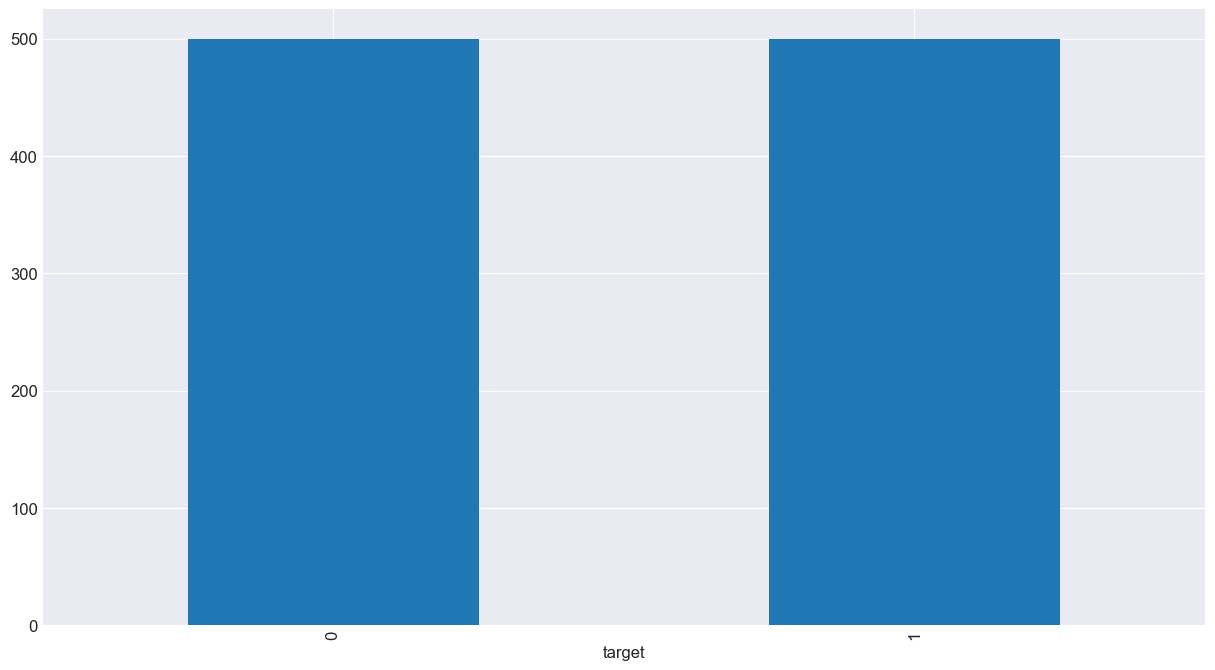

In [8]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

### Different ways of plotting data

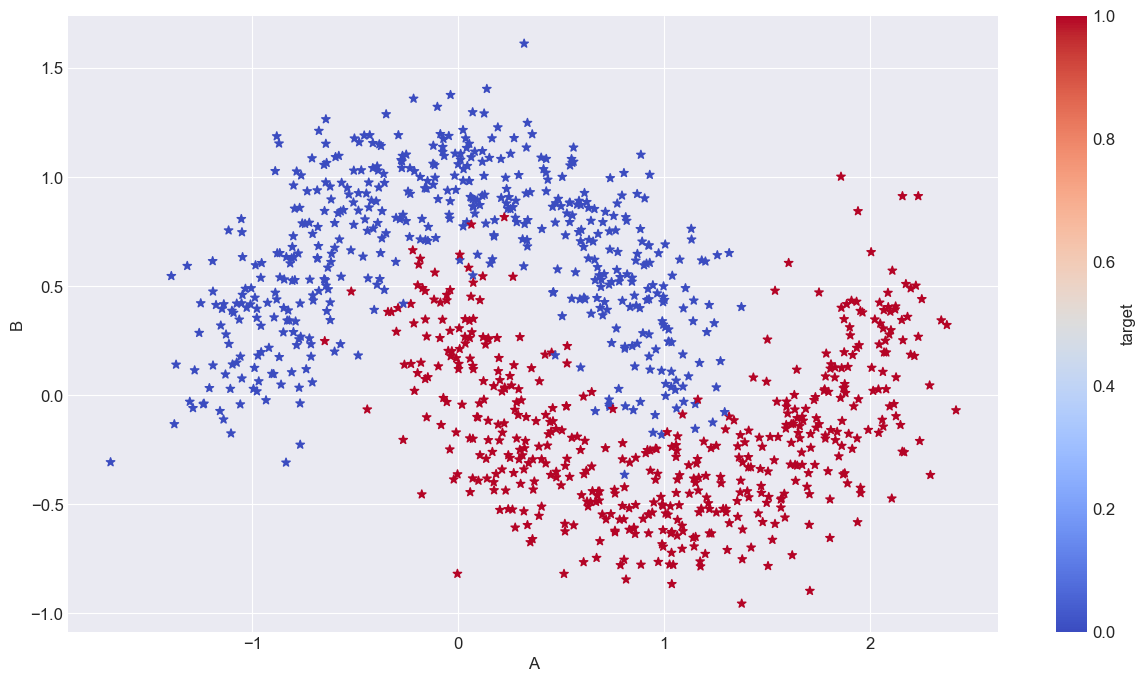

In [9]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

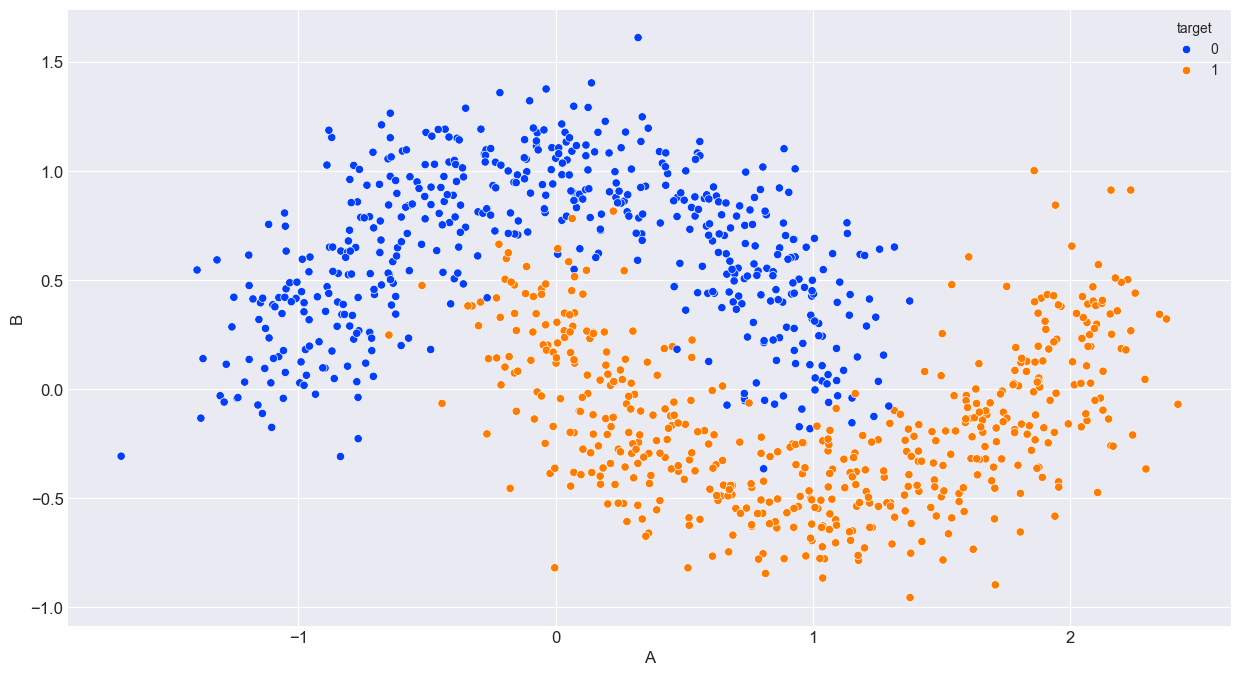

In [10]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

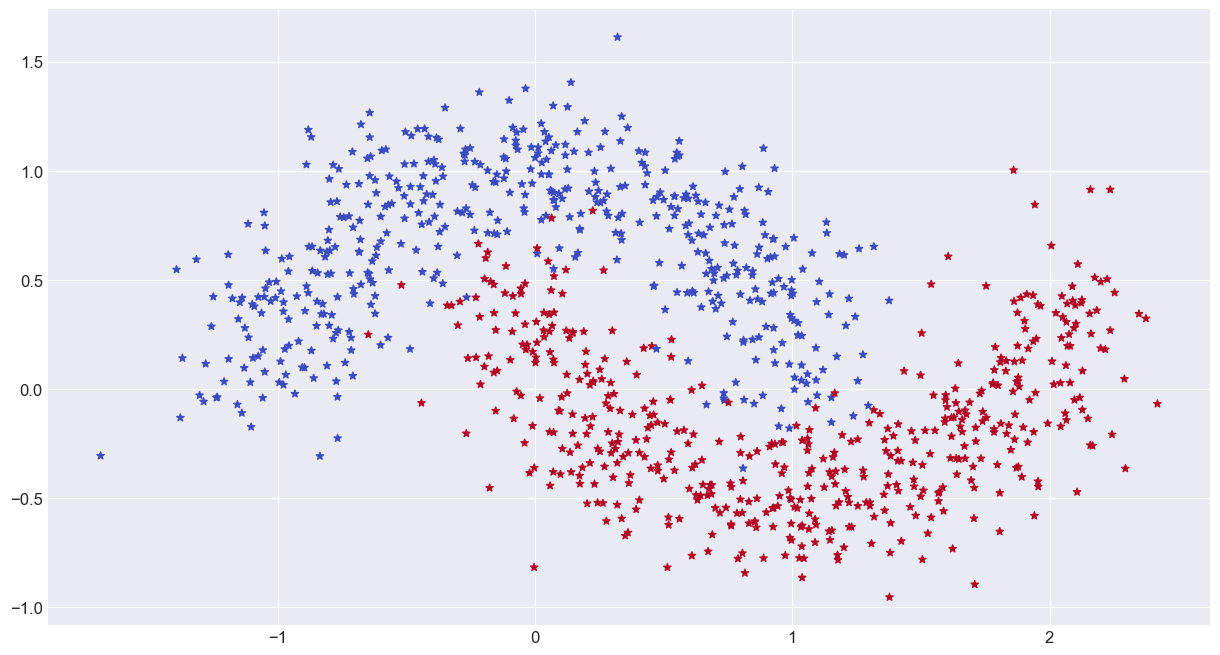

In [11]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [12]:
y= pd.get_dummies(y).to_numpy()  ### Converting y to one hot encoded data for multiclass
y

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [13]:
X_train,X_test, y_train,y_test =train_test_split(X,y,test_size=TEST_SIZE,stratify=y,random_state = RANDOM_STATE)

In [14]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [15]:
### y_train = y_train.reshape(-1,1)  ## for multiclass not needed as it alredy is 2d
### y_test = y_test.reshape(-1,1)

In [16]:
###### without using activation function

In [17]:
### softmaxt function for multiclass
def fn_softmax(z):
    exp_z = np.exp(z)
    return exp_z/(np.sum(exp_z,axis=1,keepdims = True))

def fn_activ(z):
    return np.tanh(z)

def fn_active_prime(z):
    return 1.-np.tanh(z)**2

In [18]:
def predict(model, X_p):

    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5  = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'], model['W4'], model['b4'], model['W5'], model['b5']
    
    #### forward propagation

    ## layer 1
    Z1 = X_p.dot(W1)+b1
    a1 = fn_activ(Z1)

    ## layer 2
    Z2 = a1.dot(W2)+b2
    a2 = fn_activ(Z2)

    ## layer 3
    Z3 = a2.dot(W3)+b3
    a3 = fn_activ(Z3)

    ## layer 4
    Z4 = a3.dot(W4)+b4
    a4 = fn_activ(Z4)

    ### Layer 5 
    Z5 = a4.dot(W5)+b5
    a5 = fn_softmax(Z5)  
    
    return np.argmax(a5,axis=1)### pick index of class with highest probability

In [19]:
def Cal_loss(model, X_l,y_l):

    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5  = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'], model['W4'], model['b4'], model['W5'], model['b5']

    m= X_l.shape[0]
    
    #### forward propagation

    ## layer 1
    Z1 = X_l.dot(W1)+b1
    a1 = fn_activ(Z1)

    ## layer 2
    Z2 = a1.dot(W2)+b2
    a2 = fn_activ(Z2)

    ## layer 3
    Z3 = a2.dot(W3)+b3
    a3 = fn_activ(Z3)

    ## layer 4
    Z4 = a3.dot(W4)+b4
    a4 = fn_activ(Z4)

    ### Layer 5 
    Z5 = a4.dot(W5)+b5
    a5 = fn_softmax(Z5)

    data_loss = -(y_l*np.log(a5)+(1-y_l)*np.log(1-a5)).sum()
    
    return data_loss/m

### Multiple layers
- Input layer
- Layer1-5 - Tanh
- Layer2-5 - Tanh
- Layer3-4 - Tanh
- Layer4-3 - Tanh
- Output layer

In [20]:
### Model Parameters
param = {}
loss_hist = {}
param["nn_hdim"] = [X_train.shape[1],5,5,4,3]
nn_out_dim = y_train.shape[1]

In [21]:
def built_model(X_train,y_train, nn_out, param, n_epochs = EPOCHS, alpha = ALPHA):

    '''
    Args:
        X_train: Training features
        y_train: Training labels
        nn_out: size of output
        param : number of nodes in input and hidden layers
    '''  
    m = X_train.shape[0]   
    nn_output_dim = nn_out
    
    ## W1 =  rng.random((nn_input_dim,nn_hdim),dtype = np.float32)/np.sqrt(nn_input_dim)  
    ## W2 =  rng.random((nn_hdim,nn_out),dtype = np.float32)/np.sqrt(nn_hdim)
    ## normally distributed randomly generated data not learning fast enough

    ### layer1 
    
    ### size = 2,5
    W1 =  np.random.rand(param["nn_hdim"][0],param["nn_hdim"][1])/np.sqrt(param["nn_hdim"][0])

    ### size = 5
    b1 = np.zeros((1,param["nn_hdim"][1]),dtype = 'float32')

    ### layer2

    ### size = 5,5
    W2 =  np.random.rand(param["nn_hdim"][1],param["nn_hdim"][2])/np.sqrt(param["nn_hdim"][1])

    ### size = 5
    b2 = np.zeros((1,param["nn_hdim"][2]),dtype = 'float32')

    ### Layer 3

    ### size = 5,4
    W3 =  np.random.rand(param["nn_hdim"][2],param["nn_hdim"][3])/np.sqrt(param["nn_hdim"][2])

    ### size = 4
    b3 = np.zeros((1,param["nn_hdim"][3]),dtype = 'float32')

    ### layer 4

    ### size = 4,3
    W4 =  np.random.rand(param["nn_hdim"][3],param["nn_hdim"][4])/np.sqrt(param["nn_hdim"][3])

    ### size = 3
    b4 = np.zeros((1,param["nn_hdim"][4]),dtype = 'float32')

    ### layer 5
    
    ### size = 3,2
    W5 =  np.random.rand(param["nn_hdim"][4],nn_output_dim)/np.sqrt(param["nn_hdim"][4])

    ### size = 2
    b5 = np.zeros((1,nn_output_dim),dtype = 'float32')

    curr_loss = 0
    loss, epoch = [],[]
    
    for i in range(0, n_epochs):

        #### forward propagation

        ## layer 1
        Z1 = X_train.dot(W1)+b1
        a1 = fn_activ(Z1)

        ## layer 2
        Z2 = a1.dot(W2)+b2
        a2 = fn_activ(Z2)

        ## layer 3
        Z3 = a2.dot(W3)+b3
        a3 = fn_activ(Z3)

        ## layer 4
        Z4 = a3.dot(W4)+b4
        a4 = fn_activ(Z4)

        ### Layer 5 
        Z5 = a4.dot(W5)+b5
        a5 = fn_softmax(Z5)

        #### Back Propagation

        #### layer 5
        assert (a5.shape == y_train.shape), f'check y{a5.shape}/{y_train.shape}'
        dz5 = a5-y_train  ##### remember dim of a2 and y to be same

        dw5 = (a4.T).dot(dz5)
        assert (W5.shape == dw5.shape), f'check w5 {W5.shape}/{dw5.shape}'

        db5 = np.sum(dz5,axis=0, keepdims = True)
        assert (b5.shape == db5.shape), f'check b5 {b5.shape}/{db5.shape}'

        da4 = dz5.dot(W5.T)
        assert (a4.shape == da4.shape), f'check a4 {a4.shape}/{da4.shape}'

        #### Layer 4 

        dz4 = da4 * fn_active_prime(Z4)
        assert (Z4.shape == dz4.shape), f'check Z4 {z4.shape}/{dz4.shape}' 

        dw4 = (a3.T).dot(dz4)
        assert (W4.shape == dw4.shape), f'check w1 {W4.shape}/{dw4.shape}'

        db4 = np.sum(dz4,axis=0, keepdims = True)
        assert (b4.shape == db4.shape), f'check b4 {b4.shape}/{db4.shape}'

        da3 = dz4.dot(W4.T)
        assert (a3.shape == da3.shape), f'check a3 {a3.shape}/{da3.shape}'

        #### Layer 3 

        dz3 = da3 * fn_active_prime(Z3)
        assert (Z3.shape == dz3.shape), f'check Z3 {z3.shape}/{dz3.shape}' 

        dw3 = (a2.T).dot(dz3)
        assert (W3.shape == dw3.shape), f'check w3 {W3.shape}/{dw3.shape}'

        db3 = np.sum(dz3,axis=0, keepdims = True)
        assert (b3.shape == db3.shape), f'check b3 {b3.shape}/{db3.shape}'

        da2 = dz3.dot(W3.T)
        assert (a2.shape == da2.shape), f'check a4 {a2.shape}/{da2.shape}'

        #### Layer 2 

        dz2 = da2 * fn_active_prime(Z2)
        assert (Z2.shape == dz2.shape), f'check Z2 {z2.shape}/{dz2.shape}' 

        dw2 = (a1.T).dot(dz2)
        assert (W2.shape == dw2.shape), f'check w2 {W2.shape}/{dw2.shape}'

        db2 = np.sum(dz2,axis=0, keepdims = True)
        assert (b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert (a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'

        #### Layer 1 

        dz1 = da1 * fn_active_prime(Z1)
        assert (Z1.shape == dz1.shape), f'check Z1 {z1.shape}/{dz1.shape}' 

        dw1 = (X_train.T).dot(dz1)
        assert (W1.shape == dw1.shape), f'check w1 {W1.shape}/{dw1.shape}'

        db1 = np.sum(dz1,axis=0, keepdims = True)
        assert (b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'


        ##### gradient update

        W1 += -alpha*dw1/m
        b1 += -alpha*db1/m
        W2 += -alpha*dw2/m
        b2 += -alpha*db2/m
        W3 += -alpha*dw3/m
        b3 += -alpha*db3/m
        W4 += -alpha*dw4/m
        b4 += -alpha*db4/m
        W5 += -alpha*dw5/m
        b5 += -alpha*db5/m

        model = {'W1':W1,'b1':b1,
                'W2':W2,'b2':b2,
                'W3':W3,'b3':b3,
                'W4':W4,'b4':b4,
                'W5':W5,'b5':b5}

        curr_loss = Cal_loss(model,X_train,y_train)
        loss.append(curr_loss)
        epoch.append(i)

        if i%100 == 0 :
            print(f'After epoch: {i:3d} ; loss : {curr_loss:.5f}')
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    return model

In [22]:
model = built_model(X_train,y_train, nn_out_dim, param)

After epoch:   0 ; loss : 1.37874
After epoch: 100 ; loss : 1.19052
After epoch: 200 ; loss : 0.68124
After epoch: 300 ; loss : 0.64049
After epoch: 400 ; loss : 0.62980
After epoch: 500 ; loss : 0.61682
After epoch: 600 ; loss : 0.56623
After epoch: 700 ; loss : 0.29237
After epoch: 800 ; loss : 0.32822
After epoch: 900 ; loss : 0.20350
After epoch: 1000 ; loss : 0.18469
After epoch: 1100 ; loss : 0.17461
After epoch: 1200 ; loss : 0.16862
After epoch: 1300 ; loss : 0.16478
After epoch: 1400 ; loss : 0.16213
After epoch: 1500 ; loss : 0.16022
After epoch: 1600 ; loss : 0.15879
After epoch: 1700 ; loss : 0.15768
After epoch: 1800 ; loss : 0.15681
After epoch: 1900 ; loss : 0.15611


In [23]:
model

{'W1': array([[ 0.79339372,  2.42397504,  0.63378924,  0.67373671,  0.63323265],
        [-0.19701984,  0.32284684, -0.37782668, -0.37024289, -0.33334572]]),
 'b1': array([[ 0.3353338 , -1.1503341 , -0.15352897, -0.27080402, -0.26803824]],
       dtype=float32),
 'W2': array([[ 0.26086755,  0.09917815,  0.27691692,  0.41578158,  0.19185102],
        [-1.1357706 , -0.28224792, -0.66299329, -0.95329539, -0.49573724],
        [ 0.53252388,  0.12638661,  0.30731766,  0.41981705,  0.4380413 ],
        [ 0.61954734,  0.45223334,  0.37360319,  0.46510878,  0.18065952],
        [ 0.40910627,  0.36329173,  0.42558541,  0.38407472,  0.35994845]]),
 'b2': array([[-0.09333988, -0.03057854, -0.07361345, -0.14861894,  0.01246788]],
       dtype=float32),
 'W3': array([[0.59760316, 0.70193509, 0.54277266, 0.73661152],
        [0.2381314 , 0.19770512, 0.26507578, 0.07099654],
        [0.28588733, 0.31412203, 0.33648604, 0.54913104],
        [0.46610578, 0.52977486, 0.60213919, 0.61895987],
        [0.

<Axes: xlabel='epoch'>

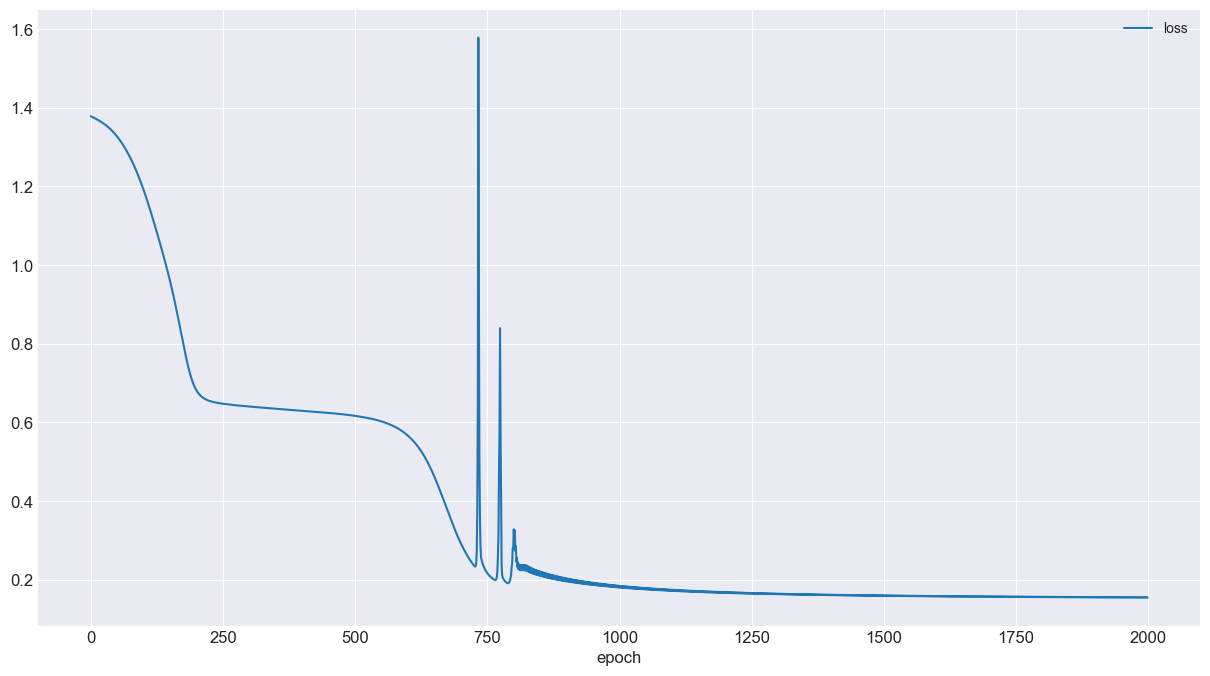

In [24]:
pd.DataFrame(loss_hist).plot(x = 'epoch')

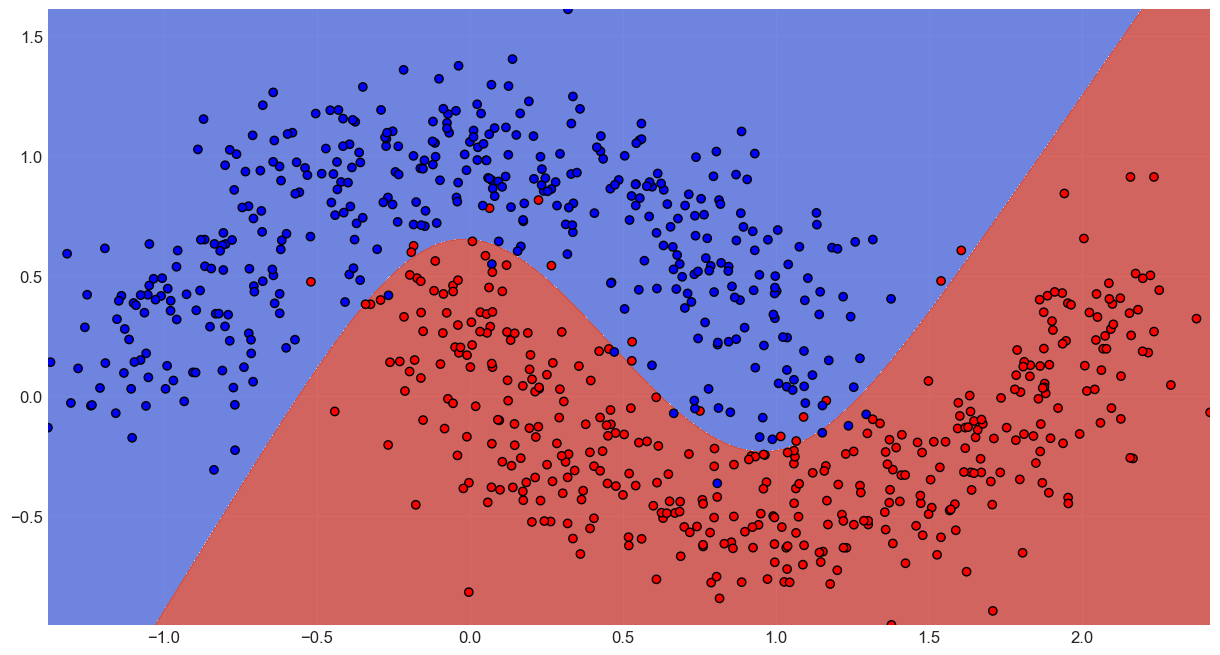

In [31]:
fig,ax = plt.subplots() ### instatiation of plt object
dm = 0.001 ## spacing of grid
x_min, x_max = X_train[:,0].min()-dm, X_train[:,0].max()+dm
y_min, y_max = X_train[:,1].min()-dm, X_train[:,1].max()+dm

xx,yy = np.meshgrid(np.arange(x_min, x_max,dm), np.arange(y_min, y_max,dm))  #### generate mesh

XX = np.c_[xx.ravel(),yy.ravel()] ### prepare feature data

y_pred = predict(model,XX)
Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx,yy,Z,cmap = CMAP, alpha = 0.8)
ax.scatter(X_train[:,0],X_train[:,1],c = y_train.argmax(axis=1),edgecolors = 'k',cmap = plt.cm.bwr)

In [32]:
### training accuracy , loss, cf

In [27]:
y_pred = predict(model, X_train)
print(accuracy_score(y_train.argmax(axis=1),y_pred))
print(Cal_loss(model, X_train,y_train))
cm = confusion_matrix(y_train.argmax(axis=1),y_pred)
cm

0.97125
0.15476007305019454


array([[392,   8],
       [ 15, 385]], dtype=int64)

In [28]:
### testing accuracy , loss, cf

In [29]:
y_pred = predict(model, X_test)
print(accuracy_score(y_test.argmax(axis=1),y_pred))
print(Cal_loss(model, X_test,y_test))
cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
cm

0.975
0.12554324104992326


array([[99,  1],
       [ 4, 96]], dtype=int64)

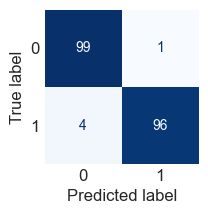

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[0,1])

fig,ax = plt.subplots(figsize=(2,2))
disp.plot(ax = ax,cmap='Blues',colorbar = False)
ax.grid(False)
plt.show()

In [36]:
tensorflow.__version__

'2.13.1'